# Metadata

```
course:   DS 5001
Module:   08 HW
Topic:    LDA with SciKit Learn
Author:   R.C. Alvarado
```

# Instructions

In this week’s code exercise, you will create topic models using `topicmodel.TopicModel`, a wrapper around Scikit Learn’s LatentDirichletAllocation class. 
Based in notebooks from Module 08, and the using the resources identified below, perform the following tasks and then answer the questions. 

The corpus is a collection of profiles from the dating app OKCupid from the San Franscisco area. It contains about 6000 profiles evenly 
divided among the cisgender categories `m` and `f`. The content is by no means salacious, but some of the language is not suitable for work, as they say.

Note the the `LIB` table has a lot of metadata features that can be used to aggregrate your results.

## Resources

* Input files: `/data/okcupid/okcupid-LIB.csv` and `/data/okcupid/okcupid-BOW.csv`
* Class file: `/lib/topicmodel.py`
 

## Steps

Import the `LIB` and `BOW` files as data frames. Set the indexes as follows:
* `LIB`: `['doc_id']`
* `BOW`: `['doc_id', 'term_str']`

Instantiate a `TopicModel` model by passing the `BOW` dataframe to the constructor.

Set the following attributes on your object, assuming your object is called `tm`: 
* `tm.n_topics = 40`
* `tm.n_terms = 2000`

Run the following methods in order, assuming your object is called `tm`:

* `tm.create_X()`
* `tm.get_model()`
* `tm.describe_topics()`
* `tm.get_model_stats()`

You can visualize your results by running `tm.plot_topics()`.

Recall that a topic model comprises three tables: `THETA`, `PHI`, and `TOPICS`. 

As usual, write your answers to the questions below and add code to this notebook after the questions section. 

# Questions

## Q1 

Give the top 5 terms (using `top_terms_rel`) associated with the most frequent topic (by `theta_sum`). This is the same as the topic with the greatest value as depicted in the bar plot produced by `tm.plot_topcics()`.

**Answer**: This will vary.

## Q2

Group the THETA table by `age` and create a heatmap of the mean topic concentrations for each age. You may use either `implot()` from Plotly Express or `df.style.gradient(axis=None)` from Pandas. What are the top 5 terms by `top_terms_rel` in the topic that appears most closely associated with older users?

**Answer**: Answers will vary, but the words may include children and golf.

## Q3

Using the same heatmap, what are the top 5 words by `top_terms_rel` for the topic most associated with *young* users?

**Answer**: Answers will vary, but the words may include gaming, drinking, etc.

## Q4

Create a similar aggregate heatmap of mean topic concentrations by `income`. Locate the cell with the highest concentration. What is the income and topic (by top 5 terms, using `top_terms_rel`)?

**Answer**: There should be a topic associated with $250,000, but not necessarily.

## Q5

Finally, create an aggregate heatmap by `sex`. Are there any topics that are strongly associated with one sex or another? A strong association in this context would one in which the absolute difference between topic weight values for a given topic is greater than or equal to `0.05`.


**Answer**: No

# Solution

In [481]:
data_home = '../labs-repo/data'
local_lib = '../labs-repo/lib'

In [482]:
data_prefix = 'okcupid'

In [496]:
n_topics = 40
n_terms = 2000

In [484]:
import pandas as pd
import numpy as np
import plotly_express as px

In [485]:
import sys; sys.path.append(local_lib)

In [486]:
from topicmodel import TopicModel

# Get the Data

In [487]:
LIB = pd.read_csv(f"{data_home}/{data_prefix}/{data_prefix}-LIB.csv").set_index('doc_id')

In [493]:
LIB.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,orientation,pets,religion,sex,sign,smokes,speaks,status,doc_raw,doc_clean
doc_id,,,,,,,,,,,,,,,,,,,,,
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,i work in a library and go to school. . . read...,i work in a library and go to school reading t...
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,...,straight,likes dogs and has cats,catholicism,f,taurus,no,english,single,nan i have an awesome career working as a seni...,nan i have an awesome career working as a seni...
43,40,fit,NaN,socially,NaN,graduated from college/university,white,71.0,60000,construction / craftsmanship,...,straight,likes dogs,agnosticism but not too serious about it,m,gemini and it&rsquo;s fun to think about,no,"english (okay), french (poorly), spanish (poor...",single,i don't really like summarizing myself; but wh...,i don t really like summarizing myself but who...
48,31,thin,strictly anything,socially,sometimes,dropped out of space camp,NaN,67.0,1000000,artistic / musical / writer,...,bisexual,NaN,NaN,f,NaN,no,"english (fluently), belarusan, gujarati, lisp,...",single,"i love it here, except when it's hotter than a...",i love it here except when it s hotter than a ...
73,31,curvy,mostly anything,socially,never,graduated from law school,indian,61.0,50000,law / legal services,...,straight,NaN,hinduism but not too serious about it,f,libra and it&rsquo;s fun to think about,no,"english (fluently), hindi (okay), spanish (poo...",single,i'm an easy-going person with a genuine apprec...,i m an easy going person with a genuine apprec...


In [488]:
BOW = pd.read_csv(f"{data_home}/{data_prefix}/{data_prefix}-BOW.csv").set_index(['doc_id','term_str'])

In [494]:
BOW.head()

n
doc_id term_str   
3      bataille  1
       beckett   1
       books     1
       cabaret   1
       cats      1

# Model

In [495]:
tm = TopicModel(BOW)

In [498]:
tm.n_topics = n_topics
tm.n_terms = n_terms

In [499]:
tm.create_X()

In [500]:
tm.get_model()
tm.describe_topics()
tm.get_model_stats()

In [569]:
tm.THETA.sum().idxmax()

13

In [570]:
tm.PHI.sum(1).idxmax()

11

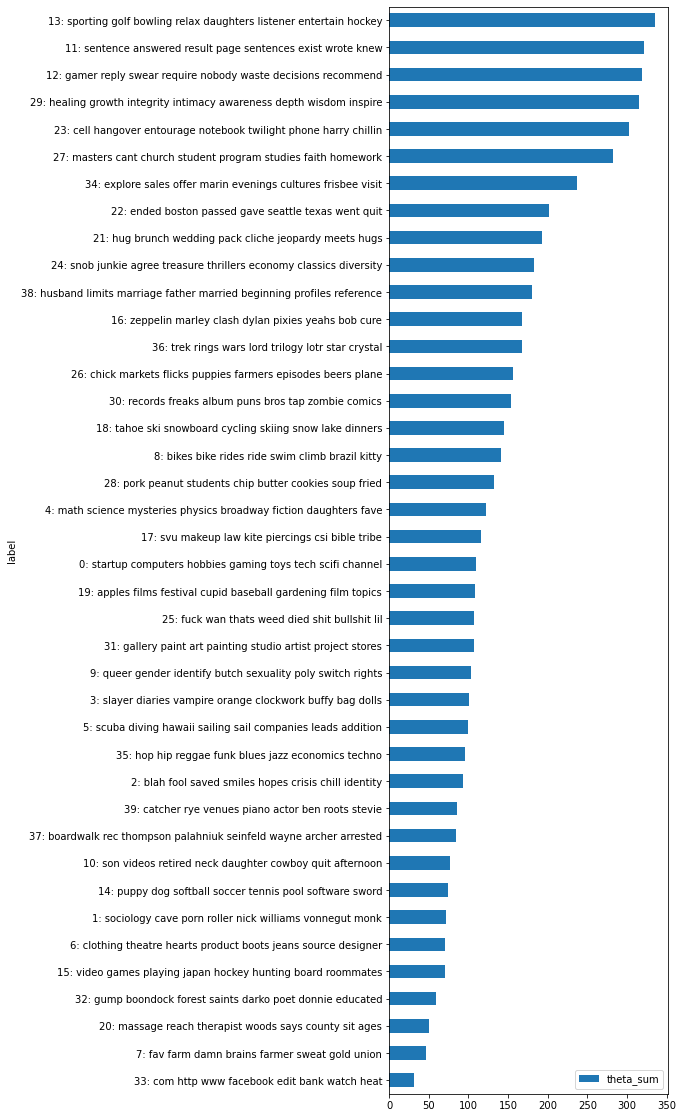

In [501]:
tm.plot_topics()

In [503]:
topic_cols = tm.THETA.columns

In [512]:
LIB.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status', 'doc_raw', 'doc_clean'],
      dtype='object')

In [524]:
G = {}
for group in ['age','sex','income']:
    G[group] = tm.THETA.join(LIB).groupby(group).mean()[topic_cols]

In [592]:
G['age'].style.background_gradient(cmap='GnBu', axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0.012603,0.004868,0.016310,0.016030,0.024765,0.005567,0.006073,0.009123,0.014099,0.013212,0.009512,0.071258,0.045757,0.014053,0.007033,0.008309,0.061785,0.021948,0.017724,0.005270,0.004263,0.012008,0.026468,0.155215,0.001950,0.036405,0.006467,0.131892,0.004934,0.032618,0.020891,0.020688,0.003453,0.008012,0.010894,0.025099,0.034724,0.052021,0.023957,0.002743
19,0.015829,0.003130,0.027811,0.012188,0.007356,0.011523,0.006457,0.007162,0.009872,0.013913,0.015911,0.021551,0.068571,0.059208,0.010492,0.009468,0.042948,0.036131,0.011079,0.003917,0.004585,0.023544,0.016456,0.175344,0.008547,0.057086,0.011527,0.130023,0.016056,0.010024,0.018452,0.029710,0.006293,0.005439,0.020788,0.016094,0.020812,0.010624,0.007390,0.016687
20,0.014235,0.008582,0.009533,0.031807,0.013853,0.006363,0.002290,0.002648,0.024054,0.014309,0.011675,0.050966,0.099952,0.018312,0.013628,0.020844,0.036751,0.025721,0.005245,0.013207,0.010438,0.030219,0.040975,0.113560,0.026534,0.038662,0.006838,0.099126,0.019514,0.024117,0.027521,0.011548,0.009342,0.004622,0.005974,0.017839,0.048267,0.013306,0.017596,0.010028
21,0.018458,0.017889,0.005943,0.018074,0.006909,0.007922,0.010097,0.011384,0.023674,0.025768,0.007270,0.055802,0.099714,0.023659,0.005720,0.029577,0.023140,0.025439,0.009214,0.016898,0.006109,0.029860,0.013916,0.136413,0.023229,0.043916,0.012822,0.067260,0.030818,0.020278,0.025793,0.016860,0.013667,0.002939,0.009031,0.009823,0.040640,0.018531,0.022209,0.013336
22,0.015795,0.008193,0.013187,0.021452,0.014978,0.007639,0.011512,0.014580,0.017305,0.022622,0.007637,0.045880,0.073682,0.022241,0.018746,0.014642,0.030577,0.030827,0.009344,0.016191,0.007294,0.028513,0.023632,0.101739,0.021092,0.039540,0.020153,0.097505,0.020759,0.023265,0.033431,0.025965,0.009335,0.003654,0.022927,0.019588,0.037325,0.017857,0.017703,0.011696
23,0.011876,0.016828,0.009695,0.019935,0.020903,0.008430,0.015257,0.004667,0.019829,0.013379,0.010932,0.050351,0.080245,0.029410,0.016085,0.014665,0.034355,0.029892,0.009170,0.016639,0.006512,0.025319,0.036933,0.086433,0.015379,0.025445,0.013451,0.080530,0.022334,0.021655,0.035289,0.014125,0.019797,0.004289,0.018427,0.023686,0.057587,0.020042,0.022505,0.017716
24,0.017130,0.017356,0.014986,0.022070,0.018983,0.009499,0.009190,0.004269,0.022176,0.019849,0.013587,0.054729,0.075640,0.024821,0.018487,0.015499,0.042243,0.017128,0.018121,0.013942,0.006209,0.023991,0.031460,0.081227,0.034226,0.023818,0.023617,0.067207,0.022835,0.044787,0.027004,0.013289,0.010739,0.007473,0.016356,0.015300,0.041501,0.018421,0.026229,0.014607
25,0.023605,0.018231,0.017732,0.020362,0.018287,0.012286,0.013459,0.007923,0.028632,0.016172,0.009807,0.047817,0.075584,0.029830,0.015739,0.009230,0.033467,0.023946,0.015283,0.019900,0.005652,0.030633,0.035193,0.069330,0.025874,0.027849,0.030526,0.061324,0.027411,0.030854,0.029736,0.020512,0.012137,0.005467,0.028786,0.011750,0.030765,0.015601,0.027917,0.015387
26,0.020169,0.014986,0.021469,0.018390,0.014057,0.011993,0.006285,0.005689,0.022746,0.017545,0.009397,0.064091,0.066191,0.040197,0.021546,0.015276,0.034051,0.019707,0.024004,0.016389,0.009904,0.036094,0.040890,0.062274,0.020949,0.019289,0.024223,0.053247,0.014645,0.033706,0.039128,0.021142,0.007415,0.005915,0.027815,0.019495,0.040057,0.024603,0.021008,0.014023


In [593]:
G['income'].T.style.background_gradient(cmap='GnBu', axis=None)

income,20000,30000,40000,50000,60000,70000,80000,100000,150000,250000,500000,1000000
0,0.014492,0.020379,0.015361,0.014942,0.012952,0.021879,0.029446,0.027497,0.022065,0.027909,0.013814,0.012668
1,0.013500,0.014119,0.011211,0.011391,0.007091,0.010835,0.010198,0.008072,0.008972,0.007620,0.000565,0.032903
2,0.014498,0.020971,0.013170,0.018507,0.013125,0.024763,0.012642,0.013643,0.021876,0.015908,0.014904,0.018701
3,0.025087,0.018117,0.017375,0.015205,0.017772,0.017478,0.009989,0.011477,0.008341,0.005802,0.000565,0.013842
4,0.018072,0.026514,0.021032,0.022398,0.017847,0.022430,0.022947,0.021271,0.025033,0.021435,0.017922,0.019135
5,0.010432,0.010655,0.013876,0.016384,0.013134,0.020338,0.026557,0.030185,0.044226,0.010586,0.025450,0.005093
6,0.011392,0.009776,0.010481,0.010291,0.012434,0.010144,0.013193,0.016117,0.016422,0.027836,0.015245,0.012380
7,0.007764,0.007775,0.009311,0.004469,0.006545,0.010378,0.005139,0.007889,0.006975,0.008965,0.066396,0.018394
8,0.022936,0.027360,0.022100,0.025558,0.024930,0.022584,0.023072,0.026420,0.020034,0.035681,0.015590,0.027737
9,0.025409,0.019097,0.017114,0.016147,0.011880,0.012165,0.011747,0.009965,0.009692,0.014423,0.007322,0.030375


In [610]:
G['sex'].T.apply(lambda x: abs(x.f - x.m), 1).describe()

count    40.000000
mean      0.006542
std       0.006259
min       0.000184
25%       0.001098
50%       0.004326
75%       0.011047
max       0.022706
dtype: float64

In [596]:
G['sex'].T.sort_values('f', ascending=False).style.background_gradient(cmap='GnBu', axis=None)

sex,f,m
29,0.065533,0.042828
13,0.063692,0.051524
27,0.052697,0.044385
23,0.051896,0.052149
12,0.048098,0.061804
34,0.047560,0.033900
11,0.047515,0.063015
21,0.044331,0.021949
38,0.031508,0.030372
28,0.030730,0.014860


In [597]:
G['sex'].T.sort_values('m', ascending=False).style.background_gradient(cmap='GnBu', axis=None)

sex,f,m
11,0.047515,0.063015
12,0.048098,0.061804
23,0.051896,0.052149
13,0.063692,0.051524
27,0.052697,0.044385
29,0.065533,0.042828
22,0.027901,0.041325
24,0.026072,0.036773
34,0.047560,0.033900
36,0.024277,0.033147


In [601]:
G['sex'].T.loc[29].f / G['sex'].T.loc[29].m

1.5301579841915838

In [603]:
G['sex'].T.loc[11].m / G['sex'].T.loc[11].f

1.326214715455945

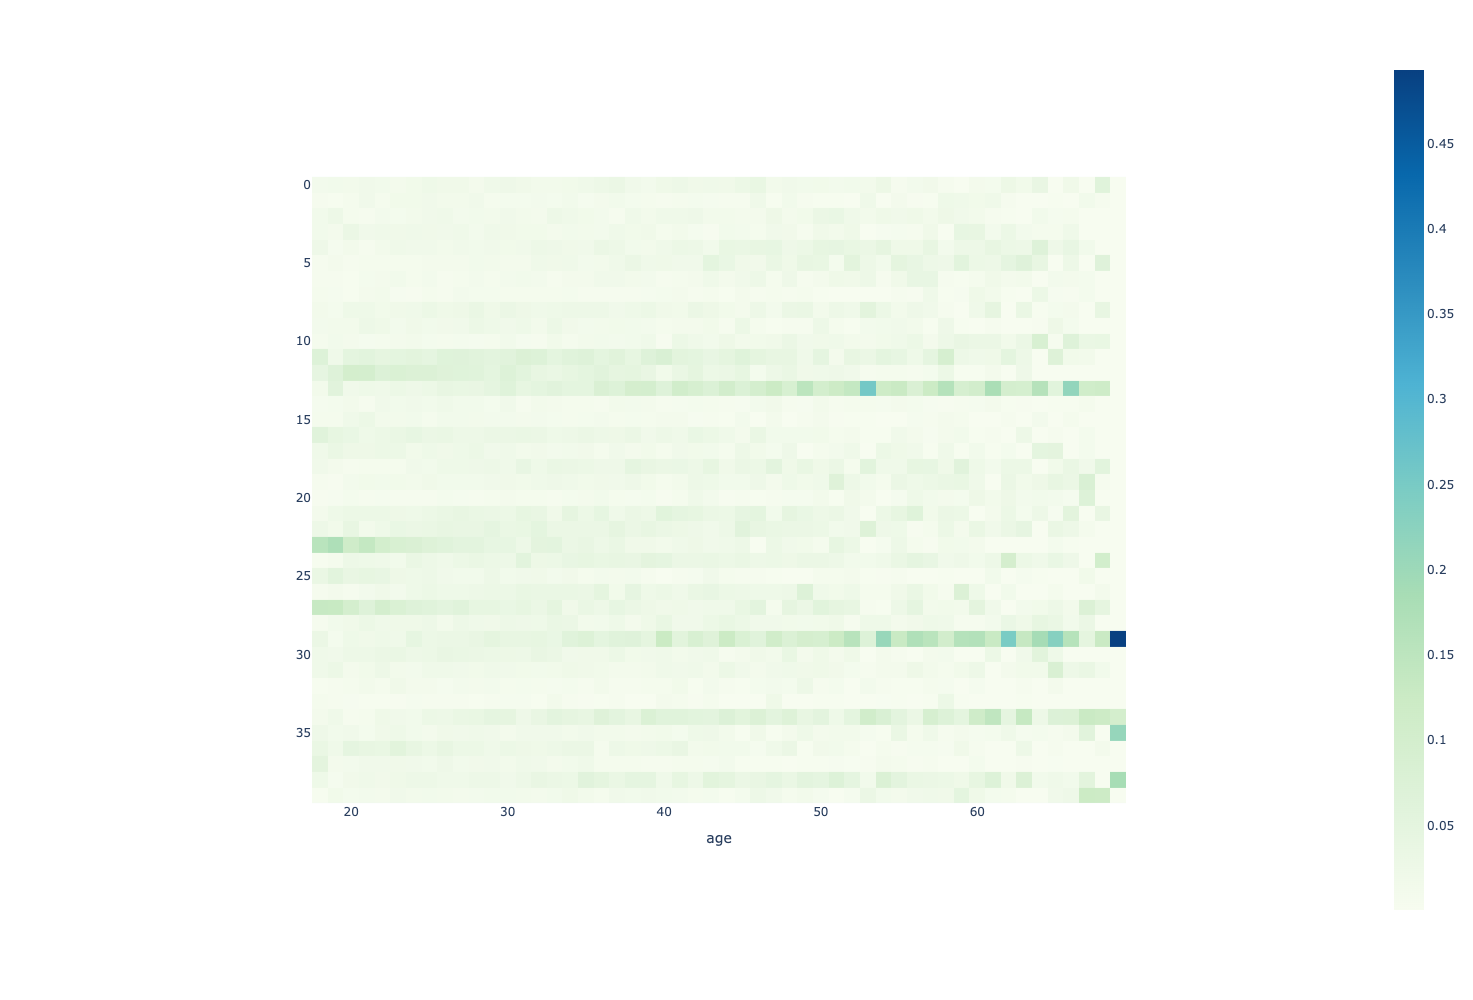

In [585]:
px.imshow(G['age'].T, width=1000, height=1000, color_continuous_scale='GnBu')

In [ ]:
tm.

In [574]:
tm.TOPIC.loc[13].top_terms_rel

'sporting golf bowling relax daughters listener entertain hockey'

In [575]:
tm.TOPIC.loc[[23,27,12]].top_terms_rel

topic_id
23    cell hangover entourage notebook twilight phon...
27    masters cant church student program studies fa...
12    gamer reply swear require nobody waste decisio...
Name: top_terms_rel, dtype: object

<AxesSubplot:xlabel='age', ylabel='t'>

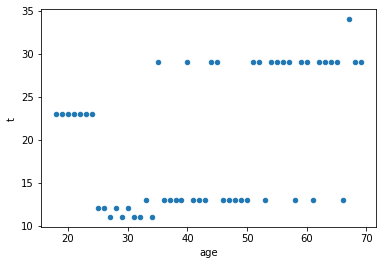

In [543]:
G['age'].idxmax(1).to_frame('t').reset_index().plot.scatter('age','t')

In [537]:
tm.TOPIC.loc[G['age'].idxmax(1)]

,phi_sum,theta_sum,h,top_terms_rel,top_terms,label
topic_id,,,,,,
23,20372.319110,302.559702,8.02,cell hangover entourage notebook twilight phon...,family movies get school know guy girl want,23: cell hangover entourage notebook twilight ...
12,31627.707527,319.443801,8.42,gamer reply swear require nobody waste decisio...,get want know anything lot something say think,12: gamer reply swear require nobody waste dec...
29,33908.368787,315.364206,9.00,healing growth integrity intimacy awareness de...,world others nature want enjoy someone dance feel,29: healing growth integrity intimacy awarenes...
13,23731.609865,335.182838,7.84,sporting golf bowling relax daughters listener...,enjoy family someone person work laugh fun humor,13: sporting golf bowling relax daughters list...
13,23731.609865,335.182838,7.84,sporting golf bowling relax daughters listener...,enjoy family someone person work laugh fun humor,13: sporting golf bowling relax daughters list...
13,23731.609865,335.182838,7.84,sporting golf bowling relax daughters listener...,enjoy family someone person work laugh fun humor,13: sporting golf bowling relax daughters list...
13,23731.609865,335.182838,7.84,sporting golf bowling relax daughters listener...,enjoy family someone person work laugh fun humor,13: sporting golf bowling relax daughters list...
13,23731.609865,335.182838,7.84,sporting golf bowling relax daughters listener...,enjoy family someone person work laugh fun humor,13: sporting golf bowling relax daughters list...
34,17655.725283,237.038452,7.90,explore sales offer marin evenings cultures fr...,enjoy bay travel area wine family city fun,34: explore sales offer marin evenings culture...


<AxesSubplot:xlabel='f', ylabel='m'>

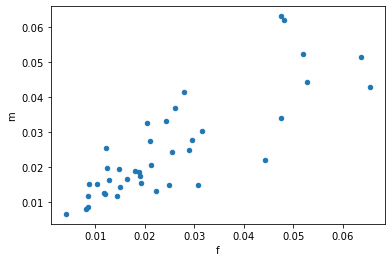

In [531]:
G['sex'].T.plot.scatter('f','m')

In [527]:
G['sex'].T.style.background_gradient(cmap='GnBu', axis=None)

sex,f,m
0,0.012146,0.025517
1,0.011758,0.012743
2,0.012369,0.019844
3,0.019264,0.015521
4,0.021274,0.020717
5,0.014762,0.019610
6,0.012011,0.012362
7,0.007987,0.008171
8,0.021091,0.027402
9,0.022317,0.013343


# Visualize

In [325]:
import plotly_express as px

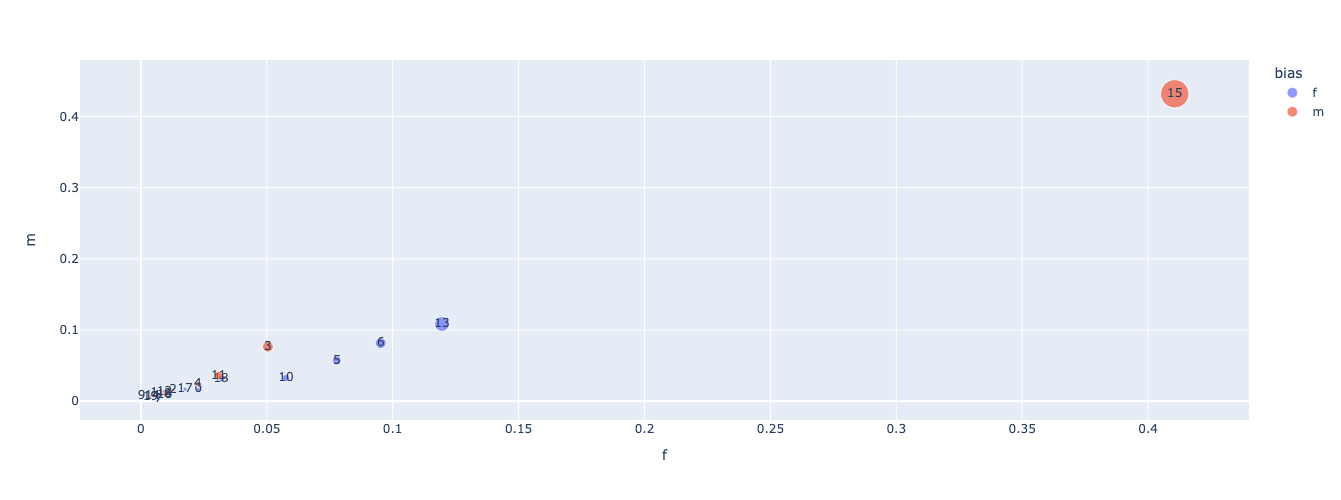

In [327]:
px.scatter(THETA_GENDER.reset_index(), 
           'f', 'm', 
           size='phi_sum', color='bias', text='index',
           hover_name='top_terms',
           height=500, width=600)